In [14]:
import pandas as pd

# GANZ GENAU dieser Pfad:
df = pd.read_csv(r'C:\Users\nikim\Desktop\listings (3).csv')

# Spalten auswählen
df = df[['price', 'latitude', 'longitude', 'number_of_reviews', 'minimum_nights', 'room_type']]

# Preis aufräumen (Dollarzeichen und Komma entfernen)
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Nullwerte entfernen
df = df.dropna()

# Ausgabe: erste 5 Zeilen anschauen
print(df.head())

   price  latitude  longitude  number_of_reviews  minimum_nights  \
0   95.0  52.53471   13.41810                148              63   
1  180.0  52.53269   13.41805                  7               6   
2   75.0  52.54813   13.40366                 26             150   
3   90.0  52.50312   13.43508                 48              93   
4   28.0  52.49419   13.42166                299              92   

         room_type  
0  Entire home/apt  
1  Entire home/apt  
2  Entire home/apt  
3  Entire home/apt  
4  Entire home/apt  


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [18]:
# X = Features (was wir wissen)
X = df[['latitude', 'longitude', 'number_of_reviews', 'minimum_nights']]

# y = Target (was wir vorhersagen wollen)
y = df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Vorhersagen auf Testdaten
y_pred = model.predict(X_test)

# Fehler messen (wie gut sind unsere Vorhersagen?)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} Euro")

Mean Absolute Error: 82.35 Euro


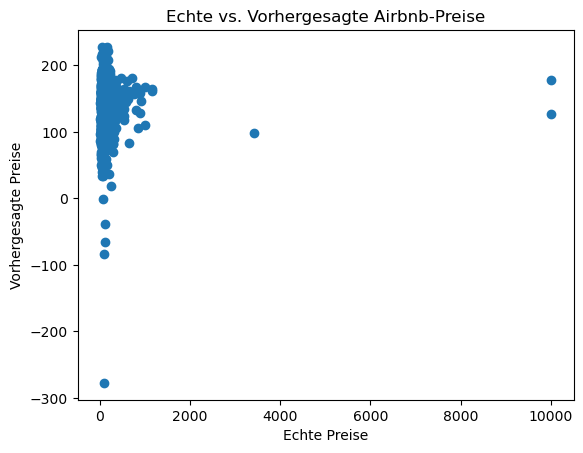

In [26]:
# Echte Preise vs Vorhersage plotten
plt.scatter(y_test, y_pred)
plt.xlabel('Echte Preise')
plt.ylabel('Vorhergesagte Preise')
plt.title('Echte vs. Vorhergesagte Airbnb-Preise')
plt.show()